# Week 1 - HMEQ EDA + Transformation

## Packages

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell


In [22]:
#enable multiple outputs
InteractiveShell.ast_node_interactivity = "all"
#enable single output
#InteractiveShell.ast_node_interactivity = "last"

In [23]:
sns.set_theme(context='notebook',style='darkgrid',palette="dark")

## Data Dictionary

| VARIABLE        | DEFINITION                                                                                                                                                             | ROLE   | TYPE     | CONVENTIONAL WISDOM                                                                                                                                                                                                                                                                                                    |
| --------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------ | -------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| TARGET_BAD_FLAG | BAD=1 (Loan was defaulted)                                                                                                                                             | TARGET | BINARY   | HMEQ = Home Equity Line of Credit Loan. BINARY TARGET                                                                                                                                                                                                                                                                  |
| TARGET_LOSS_AMT | If loan was Bad, this was the amount not repaid.                                                                                                                       | TARGET | NUMBER   | HMEQ = Home Equity Line of Credit Loan. NUMERICAL TARGET                                                                                                                                                                                                                                                               |
| LOAN            | HMEQ Credit Line                                                                                                                                                       | INPUT  | NUMBER   | The bigger the loan, the more risky the person                                                                                                                                                                                                                                                                         |
| MORTDUE         | Current Outstanding Mortgage Balance                                                                                                                                   | INPUT  | NUMBER   | If you owe a lot of money on your current mortgage versus the value of your house, you are more risky.                                                                                                                                                                                                                 |
| VALUE           | Value of your house                                                                                                                                                    | INPUT  | NUMBER   | If you owe a lot of money on your current mortgage versus the value of your house, you are more risky.                                                                                                                                                                                                                 |
| REASON          | Why do you want a loan?                                                                                                                                                | INPUT  | CATEGORY | If you are consolidating debt, that might mean you are having financial trouble.                                                                                                                                                                                                                                       |
| JOB             | What do you do for a living?                                                                                                                                           | INPUT  | CATEGORY | Some jobs are unstable (and therefore are more risky)                                                                                                                                                                                                                                                                  |
| YOJ             | Years on Job                                                                                                                                                           | INPUT  | NUMBER   | If you habe been at your job for a while, you are less likely to lose that job. That makes you less risky.                                                                                                                                                                                                             |
| DEROG           | Derogatory Marks on Credit Record. These are very bad things that stay on your credit report for 7 years. These include bankruptcies or leins placed on your property. | INPUT  | NUMBER   | Lots of Derogatories mean that something really bad happened to you (such as a bankruptcy) in your past. This makes you more risky.                                                                                                                                                                                    |
| DELINQ          | Delinquencies on your current credit report. This refers to the number of times you were overdue when paying bills in the last three years.                            | INPUT  | NUMBER   | When you have a lot of delinquencies, you might be more likely to default on a loan.                                                                                                                                                                                                                                   |
| CLAGE           | Credit Line Age (in months) is how long you have had credit. Are you a new high school student with a new credit card or have you had credit cards for many years?     | INPUT  | NUMBER   | If you have had credit for a long time, you are considered less risky than a new high school student.                                                                                                                                                                                                                  |
| NINQ            | Number of inquiries. This is the number of times within the last 3 years that you went out looking for credit (such as opening a credit card at a store)               | INPUT  | NUMBER   | Conventional wisdom in that if you are looking for more credit, you might be in financial trouble. Thus you are risky.                                                                                                                                                                                                 |
| CLNO            | Number of credit lines you have (credit cards, loans, etc.).                                                                                                           | INPUT  | NUMBER   | This is a double edged swoard. Peole who have a lot of credit lines tend to be safe. The reason is that if OTHER PEOPLE think you are trustworthy enough for a credit card, then maybe you are. However, if you have too many credit lines, you might be risky because you have the potential to run up a lot of debt. |
| DEBTINC         | Debt to Income Ratio. Take the money you spend every month and divide it by the amount of money you earn every month.                                                  | INPUT  | NUMBER   | If your debt to income ratio is high then you are risky because you might not be able to pay your bills.                                                                                                                                                                                                               |

## Part 1 - Initial Exploration & Transformation

In [24]:
initial_df = pd.read_csv('HMEQ_Loss.csv')
initial_df.head()

,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,641.0,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1109.0,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,767.0,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1425.0,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,NaN,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


### Basic Summaries

In [25]:
# shape of the data
initial_df.shape

(5960, 14)

In [26]:
# dtypes
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TARGET_BAD_FLAG  5960 non-null   int64  
 1   TARGET_LOSS_AMT  1189 non-null   float64
 2   LOAN             5960 non-null   int64  
 3   MORTDUE          5442 non-null   float64
 4   VALUE            5848 non-null   float64
 5   REASON           5708 non-null   object 
 6   JOB              5681 non-null   object 
 7   YOJ              5445 non-null   float64
 8   DEROG            5252 non-null   float64
 9   DELINQ           5380 non-null   float64
 10  CLAGE            5652 non-null   float64
 11  NINQ             5450 non-null   float64
 12  CLNO             5738 non-null   float64
 13  DEBTINC          4693 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 652.0+ KB


In [27]:
#break into groups
numerical_columns = []
categorical_columns = []
other_cols = []

dt=initial_df.dtypes

TARGET_F = 'TARGET_BAD_FLAG'
TARGET_A = 'TARGET_LOSS_AMT'

for i in dt.index:
    if i in ([TARGET_A,TARGET_F]):
        continue
    elif dt[i] in (["object"]) : 
        categorical_columns.append(i)
    elif dt[i] in (["float64"]) : 
        numerical_columns.append(i)
    elif dt[i] in (["int64"]) : 
        numerical_columns.append(i)
    else:
        other_cols.append(i)


In [28]:
# column fill rates (looking for nulls)
initial_df.isnull().mean()

TARGET_BAD_FLAG    0.000000
TARGET_LOSS_AMT    0.800503
LOAN               0.000000
MORTDUE            0.086913
VALUE              0.018792
REASON             0.042282
JOB                0.046812
YOJ                0.086409
DEROG              0.118792
DELINQ             0.097315
CLAGE              0.051678
NINQ               0.085570
CLNO               0.037248
DEBTINC            0.212584
dtype: float64

In [29]:
initial_df.describe()

,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,1189.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,13414.576955,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,10839.455965,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,224.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,5639.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,11003.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,17634.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,78987.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


### TARGET Investigation

#### Summary

One key area of interest will be how many in this dataset have defaulted and how many have not defaulted

In [30]:
# key interest area number 1
initial_df['TARGET_BAD_FLAG'].value_counts()

0    4771
1    1189
Name: TARGET_BAD_FLAG, dtype: int64

In [31]:
# same as above but representing as percentages
initial_df['TARGET_BAD_FLAG'].value_counts(normalize=True)

0    0.800503
1    0.199497
Name: TARGET_BAD_FLAG, dtype: float64

### Imputing Missing Values - Categorical

In [32]:
# Looking at categorical columns
# We can also see the mode in the most common section
for i in categorical_columns :
    print( i )
    print( initial_df[i].unique() )
    g = initial_df.groupby( i )
    print( g[i].count() )
    print( "MOST COMMON = ", initial_df[i].mode()[0] )   
    print( "MISSING = ", initial_df[i].isna().sum() , '\n')


REASON
['HomeImp' nan 'DebtCon']
REASON
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
MOST COMMON =  DebtCon
MISSING =  252 

JOB
['Other' nan 'Office' 'Sales' 'Mgr' 'ProfExe' 'Self']
JOB
Mgr         767
Office      948
Other      2388
ProfExe    1276
Sales       109
Self        193
Name: JOB, dtype: int64
MOST COMMON =  Other
MISSING =  279 



In [33]:
# We can replace the missing values with the mode
# We'll loop through again but this time create a new column with the prefix 'IMP_' and then fill the missing value
imputed_df = initial_df.copy()
for i in categorical_columns :
    if imputed_df[i].isna().sum() == 0: 
        continue
    NAME = "IMP_"+i
    imputed_df[NAME] = imputed_df[i]
    imputed_df[NAME] = imputed_df[NAME].fillna(imputed_df[NAME].mode()[0] )
    print( "variable",i," has this many missing", imputed_df[i].isna().sum() )
    print( "variable",NAME," has this many missing", imputed_df[NAME].isna().sum() ,'\n')
    g = imputed_df.groupby( NAME )
    print( g[NAME].count() )
    print( "\n\n")
    imputed_df = imputed_df.drop( i, axis=1 )


variable REASON  has this many missing 252
variable IMP_REASON  has this many missing 0 

IMP_REASON
DebtCon    4180
HomeImp    1780
Name: IMP_REASON, dtype: int64



variable JOB  has this many missing 279
variable IMP_JOB  has this many missing 0 

IMP_JOB
Mgr         767
Office      948
Other      2667
ProfExe    1276
Sales       109
Self        193
Name: IMP_JOB, dtype: int64





In [34]:

# We'll use this chunk to create a DF with 'Missing' instead of the mode
missingfill_df = initial_df.copy()
for i in categorical_columns :
    if missingfill_df[i].isna().sum() == 0 : continue
    print( i ) 
    print("HAS MISSING")
    NAME = "IMP_"+i
    print( NAME ) 
    missingfill_df[NAME] = missingfill_df[i]
    missingfill_df[NAME] = missingfill_df[NAME].fillna('Missing')
    print( "variable",i," has this many missing", missingfill_df[i].isna().sum())
    print( "variable",NAME," has this many missing", missingfill_df[NAME].isna().sum())
    g = missingfill_df.groupby( NAME )
    print( g[NAME].count())
    print( "\n\n")
    missingfill_df = missingfill_df.drop(i, axis=1)

REASON
HAS MISSING
IMP_REASON
variable REASON  has this many missing 252
variable IMP_REASON  has this many missing 0
IMP_REASON
DebtCon    3928
HomeImp    1780
Missing     252
Name: IMP_REASON, dtype: int64



JOB
HAS MISSING
IMP_JOB
variable JOB  has this many missing 279
variable IMP_JOB  has this many missing 0
IMP_JOB
Mgr         767
Missing     279
Office      948
Other      2388
ProfExe    1276
Sales       109
Self        193
Name: IMP_JOB, dtype: int64





### Imputing Missing Values - Continuous

### One-Hot Encoding for Categorical Columns

In [35]:
#before beginning the one-hot encoding process, we'll save a copy for data visualization
imputed_df_vis = imputed_df.copy()

In [36]:
imputed_df

,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,IMP_REASON,IMP_JOB
0,1,641.0,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,HomeImp,Other
1,1,1109.0,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,HomeImp,Other
2,1,767.0,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,HomeImp,Other
3,1,1425.0,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DebtCon,Other
4,0,NaN,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,HomeImp,Office
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,NaN,88900,57264.0,90185.0,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347,DebtCon,Other
5956,0,NaN,89000,54576.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971,DebtCon,Other
5957,0,NaN,89200,54045.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590,DebtCon,Other
5958,0,NaN,89800,50370.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882,DebtCon,Other


#### Numerical Columns

In [37]:
missing_flag_cols = []

In [38]:
for i in numerical_columns:
    if imputed_df[i].isna().sum() == 0:
        continue
    FLAG = 'M_' + i
    IMP = 'IMP_' + i
    imputed_df[FLAG] = imputed_df[i].isna() + 0
    missing_flag_cols.append(FLAG)
    imputed_df[IMP] = imputed_df[i]
    imputed_df.loc[imputed_df[IMP].isna(),IMP] = imputed_df[i].median()
    imputed_df = imputed_df.drop(i, axis=1)

imputed_df

,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,IMP_REASON,IMP_JOB,M_MORTDUE,IMP_MORTDUE,M_VALUE,IMP_VALUE,M_YOJ,...,M_DELINQ,IMP_DELINQ,M_CLAGE,IMP_CLAGE,M_NINQ,IMP_NINQ,M_CLNO,IMP_CLNO,M_DEBTINC,IMP_DEBTINC
0,1,641.0,1100,HomeImp,Other,0,25860.0,0,39025.0,0,...,0,0.0,0,94.366667,0,1.0,0,9.0,1,34.818262
1,1,1109.0,1300,HomeImp,Other,0,70053.0,0,68400.0,0,...,0,2.0,0,121.833333,0,0.0,0,14.0,1,34.818262
2,1,767.0,1500,HomeImp,Other,0,13500.0,0,16700.0,0,...,0,0.0,0,149.466667,0,1.0,0,10.0,1,34.818262
3,1,1425.0,1500,DebtCon,Other,1,65019.0,1,89235.5,1,...,1,0.0,1,173.466667,1,1.0,1,20.0,1,34.818262
4,0,NaN,1700,HomeImp,Office,0,97800.0,0,112000.0,0,...,0,0.0,0,93.333333,0,0.0,0,14.0,1,34.818262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,NaN,88900,DebtCon,Other,0,57264.0,0,90185.0,0,...,0,0.0,0,221.808718,0,0.0,0,16.0,0,36.112347
5956,0,NaN,89000,DebtCon,Other,0,54576.0,0,92937.0,0,...,0,0.0,0,208.692070,0,0.0,0,15.0,0,35.859971
5957,0,NaN,89200,DebtCon,Other,0,54045.0,0,92924.0,0,...,0,0.0,0,212.279697,0,0.0,0,15.0,0,35.556590
5958,0,NaN,89800,DebtCon,Other,0,50370.0,0,91861.0,0,...,0,0.0,0,213.892709,0,0.0,0,16.0,0,34.340882


In [39]:
#break into groups for the imputed df
imp_numerical_columns = []
imp_categorical_columns = []
imp_other_cols = []

dt=imputed_df.dtypes

TARGET_F = 'TARGET_BAD_FLAG'
TARGET_A = 'TARGET_LOSS_AMT'

for i in dt.index:
    if i in ([TARGET_A,TARGET_F]):
        continue
    elif dt[i] in (missing_flag_cols):
        imp_other_cols.append(i)
    elif dt[i] in (["object"]) : 
        imp_categorical_columns.append(i)
    elif dt[i] in (["float64"]) : 
        imp_numerical_columns.append(i)
    elif dt[i] in (["int64"]) : 
        imp_numerical_columns.append(i)
    else:
        imp_other_cols.append(i)

In [40]:
#bulk one hot encoding for categorical variables
for i in imp_categorical_columns:
    prefix_name = 'z_' + i
    y = pd.get_dummies(imputed_df[i],prefix=prefix_name,drop_first=True)
    imputed_df = pd.concat([imputed_df,y],axis=1)
    imputed_df = imputed_df.drop(i,axis=1)


imputed_df

,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,M_MORTDUE,IMP_MORTDUE,M_VALUE,IMP_VALUE,M_YOJ,IMP_YOJ,M_DEROG,...,M_CLNO,IMP_CLNO,M_DEBTINC,IMP_DEBTINC,z_IMP_REASON_HomeImp,z_IMP_JOB_Office,z_IMP_JOB_Other,z_IMP_JOB_ProfExe,z_IMP_JOB_Sales,z_IMP_JOB_Self
0,1,641.0,1100,0,25860.0,0,39025.0,0,10.5,0,...,0,9.0,1,34.818262,1,0,1,0,0,0
1,1,1109.0,1300,0,70053.0,0,68400.0,0,7.0,0,...,0,14.0,1,34.818262,1,0,1,0,0,0
2,1,767.0,1500,0,13500.0,0,16700.0,0,4.0,0,...,0,10.0,1,34.818262,1,0,1,0,0,0
3,1,1425.0,1500,1,65019.0,1,89235.5,1,7.0,1,...,1,20.0,1,34.818262,0,0,1,0,0,0
4,0,NaN,1700,0,97800.0,0,112000.0,0,3.0,0,...,0,14.0,1,34.818262,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,NaN,88900,0,57264.0,0,90185.0,0,16.0,0,...,0,16.0,0,36.112347,0,0,1,0,0,0
5956,0,NaN,89000,0,54576.0,0,92937.0,0,16.0,0,...,0,15.0,0,35.859971,0,0,1,0,0,0
5957,0,NaN,89200,0,54045.0,0,92924.0,0,15.0,0,...,0,15.0,0,35.556590,0,0,1,0,0,0
5958,0,NaN,89800,0,50370.0,0,91861.0,0,14.0,0,...,0,16.0,0,34.340882,0,0,1,0,0,0


In [50]:
imputed_df.to_csv('imputed.csv')

## Part 2 - Deep Dives & Visualizations

For defaulted loans, let's look at the basic statistics around the amount defaulted. 

In [41]:
initial_df['TARGET_LOSS_AMT'].describe()

count     1189.000000
mean     13414.576955
std      10839.455965
min        224.000000
25%       5639.000000
50%      11003.000000
75%      17634.000000
max      78987.000000
Name: TARGET_LOSS_AMT, dtype: float64

<AxesSubplot:ylabel='Frequency'>

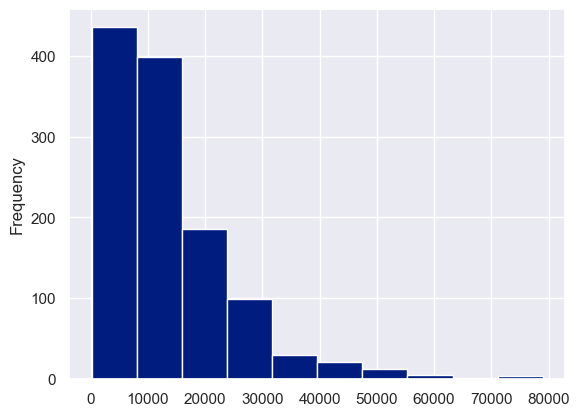

In [42]:
initial_df['TARGET_LOSS_AMT'].plot.hist()

For all loans, let's look at the total loan amount

In [43]:
initial_df['LOAN'].describe()

count     5960.000000
mean     18607.969799
std      11207.480417
min       1100.000000
25%      11100.000000
50%      16300.000000
75%      23300.000000
max      89900.000000
Name: LOAN, dtype: float64

<AxesSubplot:ylabel='Frequency'>

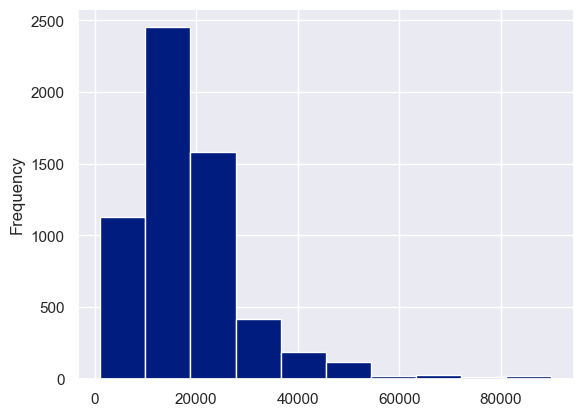

In [44]:
initial_df['LOAN'].plot.hist()

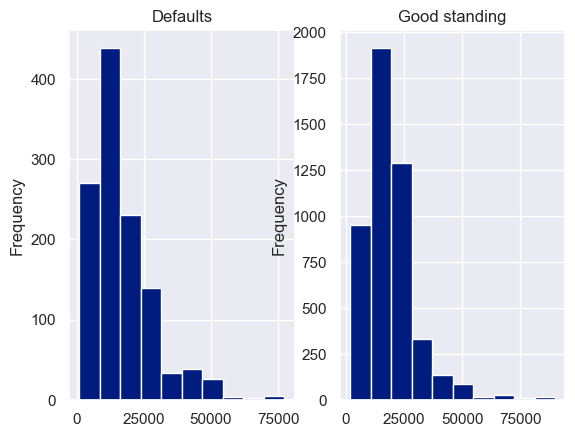

In [45]:
#going one level deeper to see if initial loan amounts differ for defaulters vs not defaulters
loan_by_default_fig, loan_by_default_axes = plt.subplots(1,2)
initial_df[initial_df['TARGET_BAD_FLAG'] == 1]['LOAN'].plot.hist(title="Defaults",ax=loan_by_default_axes[0])
initial_df[initial_df['TARGET_BAD_FLAG'] == 0]['LOAN'].plot.hist(title="Good standing",ax=loan_by_default_axes[1]);

### Looking at numerical columns

In [46]:
imputed_df[imp_numerical_columns].describe()

,LOAN,IMP_MORTDUE,IMP_VALUE,IMP_YOJ,IMP_DEROG,IMP_DELINQ,IMP_CLAGE,IMP_NINQ,IMP_CLNO,IMP_DEBTINC
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,18607.969799,73001.041812,101540.387423,8.756166,0.224329,0.405705,179.440725,1.170134,21.247819,34.000651
std,11207.480417,42552.726779,56869.436682,7.259424,0.798458,1.079256,83.574697,1.653866,9.951308,7.644528
min,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,11100.000000,48139.000000,66489.500000,3.000000,0.000000,0.000000,117.371430,0.000000,15.000000,30.763159
50%,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,23300.000000,88200.250000,119004.750000,12.000000,0.000000,0.000000,227.143058,2.000000,26.000000,37.949892
max,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


[Text(0.5, 0, 'LOANS')]

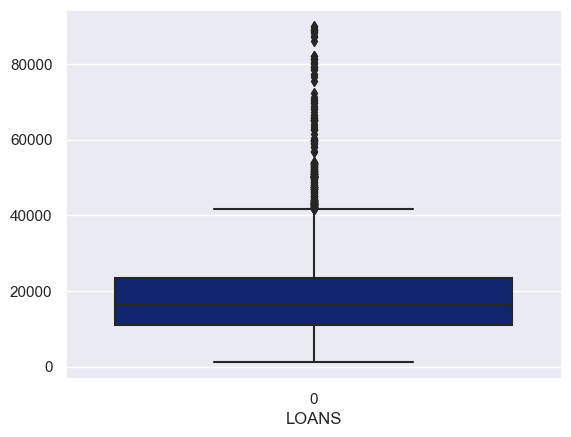

In [47]:
loannums = imputed_df[imp_numerical_columns[0]]
bignums = imputed_df[imp_numerical_columns[1:3]]
smallnums = imputed_df[imp_numerical_columns[4:]]

q = sns.boxplot(data=loannums)
q.set(xlabel='LOANS')
#plt.xticks(rotation=90)

In [48]:
for col in imp_numerical_columns:
    outliers = imputed_df[imputed_df[col] > imputed_df[col].mean() + 3 * imputed_df[col].std()]

In [49]:
imputed_df['id'] = imputed_df[['LOAN', 'IMP_JOB','IMP_CLAGE']].sum(axis=1).map(hash)
templist = imp_numerical_columns+['id']
melted = imputed_df[templist].melt(id_vars=['id'],var_name='features')

KeyError: "['IMP_JOB'] not in index"

In [ ]:
sns.catplot(data=melted,kind='box',x='value',y='features',col='features',col_wrap=2,sharey=False,sharex=False)
plt.savefig('demo_boxplots.png', transparent=True)

In [ ]:
# looking at pearson correlation for all our columns excluding the M_ columns which just flag missing value records
imputed_df.loc[:, ~imputed_df.columns.isin(missing_flag_cols)].corr(method='pearson')

In [ ]:
#looking at all numerical columns pairwise
# most of this is self-explantory like VALUE & MORTDUE being very closely related
sns.pairplot(imputed_df_vis)
plt.show()

In [ ]:
# Looking at the distribution of the numerical columns
imputed_df_vis[numerical_columns].hist(figsize=(10, 10), layout=(4, 4));

### Looking at categorical columns

#### REASON

In [ ]:
# categorical columns are a bit more difficult. we'll need to check and go one by one
initial_df['REASON'].value_counts()

In [ ]:
sns.countplot(x=missingfill_df['IMP_REASON']);
plt.savefig('demo_reason.png', transparent=True)

In [ ]:
#going one level deeper to see if initial loan amounts differ reason
reason_fig, reason_axes = plt.subplots(1,3,figsize=(15,10))
sns.countplot(x=missingfill_df[missingfill_df['IMP_REASON'] == 'HomeImp']['TARGET_BAD_FLAG'],ax=reason_axes[0]).set(title='HomeImp Defaults')
sns.countplot(x=missingfill_df[missingfill_df['IMP_REASON'] == 'DebtCon']['TARGET_BAD_FLAG'],ax=reason_axes[1]).set(title='DebtCon')
sns.countplot(x=missingfill_df[missingfill_df['IMP_REASON'] == 'missing']['TARGET_BAD_FLAG'],ax=reason_axes[2]).set(title='missing');

#### JOBS

In [ ]:
initial_df['JOB'].value_counts()

In [ ]:
sns.countplot(x=missingfill_df['IMP_JOB']);
plt.savefig('demo_job.png', transparent=True)

Self employed persons and sales persons seem to have very high rates of default compared to other employment groups

In [ ]:
# job could also be an interesting predictor
plt.figure(figsize=(10, 5))

job_grouped = missingfill_df.groupby(['IMP_JOB','TARGET_BAD_FLAG']).agg({'LOAN':'count'})
job_grouped.unstack(0).plot.bar()


In [ ]:
jobs_plot = sns.catplot(kind='bar',x='IMP_JOB',y='LOAN',data=missingfill_df,hue="TARGET_BAD_FLAG",ci = None,estimator=lambda x: len(x))
jobs_plot.set(xlabel='Jobs', ylabel='Count of Loans')
plt.savefig('demo_missing.png', transparent=True)

In [ ]:
jobs_plot = sns.catplot(kind='bar',x='IMP_JOB',y='LOAN',data=imputed_df_vis,hue="TARGET_BAD_FLAG",ci = None,estimator=lambda x: len(x))
jobs_plot.set(xlabel='Imputed Jobs', ylabel='Count of Loans')
plt.savefig('demo_imputed.png', transparent=True)

In [ ]:
# We should look at the percentages to get a real understanding
# Mgr, Other, Sales, and Self have high default rates of >20%.
# Sales and Self are >30%
job_grouped['% of'] = job_grouped.groupby(level=0).apply(lambda x: 100*x / x.sum())
job_grouped